In [61]:
from patchseq_utils import l1_load, util, plot_umap as pu

from importlib import reload
reload(l1_load)
reload(util)

<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [14]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from patchseq_utils import analysis as utils, plotting as plot
from adjustText import adjust_text
sns.set(style='ticks', context='talk')
# sns.set(style='ticks', context='notebook')

In [16]:
# path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/Mm_VISp_AIT2.3.0_20047_202005/tsne.feather"
# tsne = pd.read_feather(path).set_index('sample_id')
# tsne.head()

## Mouse

In [17]:
path = projectdir/"seurat_umap_mouse.csv"
path = projectdir/"seurat_mouse_sct.csv"
umap_mouse = pd.read_csv(path, index_col=0)
mouse_df = mouse_df.join(umap_mouse, on='sample_id')

In [18]:
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/Mm_VISp_AIT2.3.0_20047_202005/"
mouse_facs = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False).set_index('sample_id')

In [19]:
mouse_facs = mouse_facs.join(umap_mouse)
mouse_facs[cluster] = mouse_facs['cluster'].astype(ttypes_mouse)

In [91]:
# x='all_x', y='all_y'
x='UMAP_1'
y='UMAP_2'
l1 = mouse_facs[mouse_facs['cluster'].isin(l1_types_mouse)]

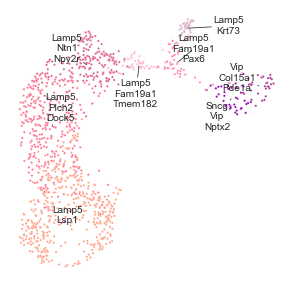

In [92]:
dim = 5
pu.plot_umap_labeled(l1, x=x, y=y, cluster='cluster', palette=palette_mouse, s=5,
                      figsize=(dim, dim), axes=False)
plt.savefig(figdir/"f1_mouse_umap.pdf")

206

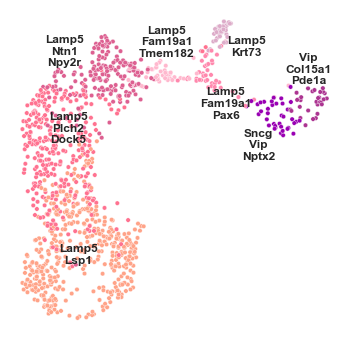

In [51]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=l1, x=x, y=y, hue=cluster, palette=palette_mouse, s=20, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
centroids = l1.groupby('cluster')[[x,y]].mean()
texts = [plt.text(data[x], data[y], name.replace(' ', '\n'), 
                  ha='center', va='center', ma='center', size=12, weight='bold') 
         for name, data in centroids.iterrows()]
adjust_text(texts, l1[x].values, l1[y].values, 
            force_points=0.01, force_text=0.3, expand_points=(1,1))
# plt.legend(title='mouse L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
# plt.legend(title='mouse L1 types', bbox_to_anchor=(0.4, 0.6), loc='upper left')

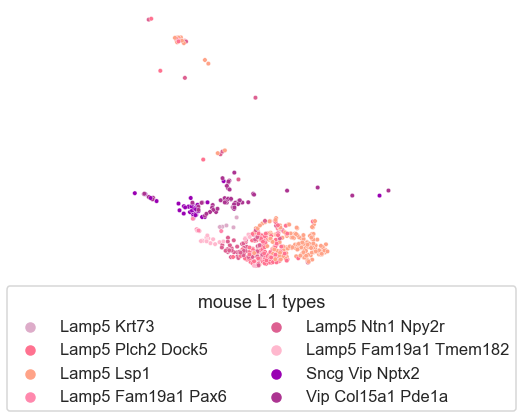

In [5]:
# PS tsne coords from shiny dir - not great
plt.figure(figsize=(5,5))
sns.scatterplot(data=mouse_df, x='tsne_x', y='tsne_y', hue=cluster, palette=palette_mouse, s=20)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.legend(title='mouse L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)

Text(0, 0.5, '')

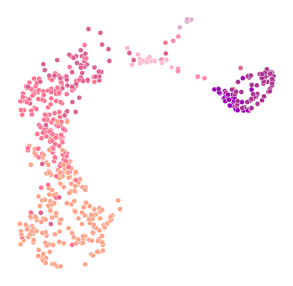

In [58]:

plt.figure(figsize=(5,5))
sns.scatterplot(data=mouse_df, x='UMAP_1', y='UMAP_2', hue=cluster, palette=palette_mouse, s=25, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend( title='human L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)

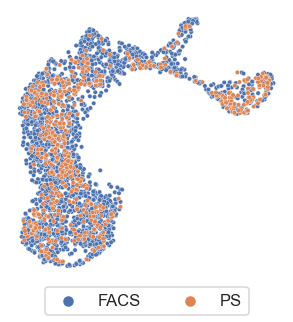

In [59]:
umap_mouse['dataset'] = umap_mouse.index.map(lambda x: 'PS' if x in mouse_df.sample_id.unique() else 'FACS')
plt.figure(figsize=(5,5))
sns.scatterplot(data=umap_mouse, x='UMAP_1', y='UMAP_2', hue='dataset', s=20)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)

## Human

In [49]:
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/MTG_paper_rev/"
human_facs = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False).set_index('sample_id')

In [50]:
# umap_df = pd.read_csv("/home/tom.chartrand/work/r_patchseq/l1_manuscript/umap_integrated.csv", index_col=0)
umap_df = pd.read_csv(projectdir/"seurat_human_sct.csv", index_col=0)
human_facs = human_facs.join(umap_df, on='sample_id', how='inner')
human_df = human_df.join(umap_df, on='sample_id', rsuffix='_r')
human_facs['cluster'] = human_facs['cluster'].map(shorten_name).astype(ttypes_human)

In [51]:
l1 = human_facs[human_facs['cluster'].isin(l1_types_human)]

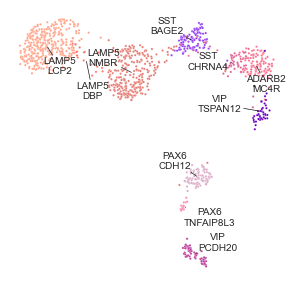

In [89]:
dim = 5
pu.plot_umap_labeled(l1, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=5,
                      figsize=(dim, dim), axes=False)
plt.savefig(figdir/"f1_human_umap.pdf")

In [62]:
reload(pu)

<module 'patchseq_utils.plot_umap' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plot_umap.py'>

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].cat.remove_unused_categories()


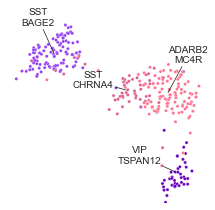

In [87]:
clusters = [
    'SST BAGE2',
    'SST CHRNA4',
    'ADARB2 MC4R',
    'VIP TSPAN12'
]
df = l1[l1['cluster'].isin(clusters)].pipe(remove_unused_categories)
dim = 3.6
pu.plot_umap_labeled(df, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=10,
                      figsize=(dim, dim), axes=False, force_points=0.5, force_text=0, ylim=(-2.5, 4.2))
plt.savefig(figdir/"f4_rosehip_umap.pdf")

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].cat.remove_unused_categories()


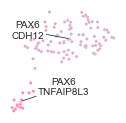

In [88]:
clusters = [
    'PAX6 CDH12',
    'PAX6 TNFAIP8L3',
]
df = l1[l1['cluster'].isin(clusters)].pipe(remove_unused_categories)
dim = 2
pu.plot_umap_labeled(df, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=10,
                      figsize=(dim, dim), axes=False, force_points=0.5, force_text=0)
plt.savefig(figdir/"f5_pax6_umap.pdf")

500

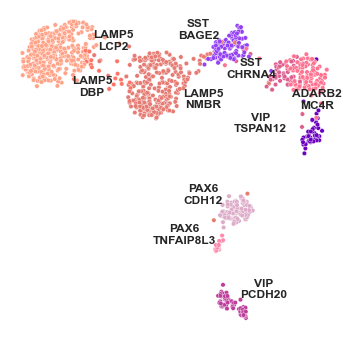

In [52]:
plt.figure(figsize=(6,6))
x='UMAP_1'
y='UMAP_2'
sns.scatterplot(data=l1, x=x, y=y, hue='cluster', palette=palette_human, s=20, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend( title='human L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
# plt.legend(title='human L1 types', bbox_to_anchor=(0.6, 0.65), loc='upper right')
centroids = l1.groupby('cluster')[[x,y]].mean()
texts = [plt.text(data[x], data[y], name.replace(' ', '\n'), 
                  ha='center', va='center', ma='center', size=12, weight='bold') 
         for name, data in centroids.iterrows()]
adjust_text(texts, l1[x].values, l1[y].values, 
            force_points=0.01, force_text=0.3, expand_points=(1,1))

Text(0, 0.5, '')

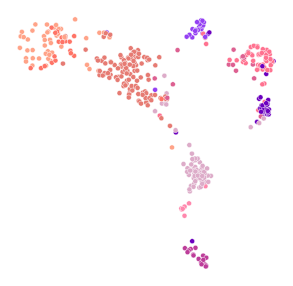

In [54]:

plt.figure(figsize=(5,5))
sns.scatterplot(data=human_df, x='UMAP_1', y='UMAP_2', hue=cluster, palette=palette_human, s=25, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend( title='human L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)

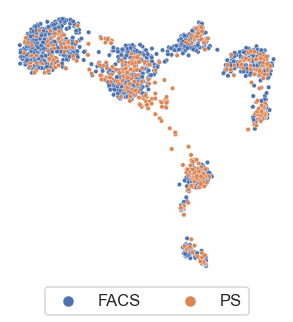

In [45]:
umap_df['dataset'] = umap_df.index.map(lambda x: 'PS' if x in human_df.sample_id.unique() else 'FACS')
plt.figure(figsize=(5,5))
sns.scatterplot(data=umap_df, x='UMAP_1', y='UMAP_2', hue='dataset', s=20)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)